In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [3]:
data = pd.read_csv('../artifacts/sentiment_analysis.csv')

In [4]:
data.head()

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...


##DATA PREPROSASING

In [6]:
data.shape

(7920, 3)

In [7]:
data.duplicated().sum()

0

In [8]:
data.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

###Text Preprocessing

In [10]:
import re
import string

In [12]:
data["tweet"].head(5)

0    #fingerprint #Pregnancy Test https://goo.gl/h1...
1    Finally a transparant silicon case ^^ Thanks t...
2    We love this! Would you go? #talk #makememorie...
3    I'm wired I know I'm George I was made that wa...
4    What amazing service! Apple won't even talk to...
Name: tweet, dtype: object

CONVERT TO LOWERCASE

In [14]:
data["tweet"] = data["tweet"].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [15]:
data["tweet"].head(5)

0    #fingerprint #pregnancy test https://goo.gl/h1...
1    finally a transparant silicon case ^^ thanks t...
2    we love this! would you go? #talk #makememorie...
3    i'm wired i know i'm george i was made that wa...
4    what amazing service! apple won't even talk to...
Name: tweet, dtype: object

REMOVE LINKS


In [16]:
data["tweet"] = data['tweet'].apply(lambda x: " ".join(re.sub(r'^https?:\/\/.*[\r\n]*', '', x, flags=re.MULTILINE) for x in x.split()))

In [17]:
data["tweet"].head(5)

0    #fingerprint #pregnancy test  #android #apps #...
1    finally a transparant silicon case ^^ thanks t...
2    we love this! would you go? #talk #makememorie...
3    i'm wired i know i'm george i was made that wa...
4    what amazing service! apple won't even talk to...
Name: tweet, dtype: object

REMOVE PUNCTUATIONS

In [19]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [20]:
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

data["tweet"] = data["tweet"].apply(remove_punctuations)

In [28]:
data["tweet"].tail(20)

7900    why did my iphone calendar link with my facebo...
7901    brendanbrady the new apple advert can fuck off...
7902    all i wanna do is put music from my itunes on ...
7903    kaylahinks snapchatprobbz haha so true deleted...
7904    fuckyou apple one thing stops working and i ha...
7905    ove a fist inside my  oh god i a fist inside m...
7906    legit feels like i have a brand new phone appl...
7907    tipsy rhymes with e ye we je mi ne donts miss ...
7908    second fucking time stay on hold for  mins and...
7909    rt monteithelgort first post from my new phone...
7910    perfect match instagood applewatch red instagr...
7911    i am completely in love with the new iphone em...
7912    tune in turn on drop out  gtd in one app  mobi...
7913    ok so my galaxy crashed after one day now i ha...
7914    gain followers rt this must follow me i follow...
7915    live out loud lol liveoutloud selfie smile son...
7916    we would like to wish you an amazing day make ...
7917    helpin

REMOVE NUMBERS

In [27]:
data["tweet"] = data["tweet"].str.replace(r'\d+', '', regex=True)

In [29]:
data["tweet"].tail(10)

7910    perfect match instagood applewatch red instagr...
7911    i am completely in love with the new iphone em...
7912    tune in turn on drop out  gtd in one app  mobi...
7913    ok so my galaxy crashed after one day now i ha...
7914    gain followers rt this must follow me i follow...
7915    live out loud lol liveoutloud selfie smile son...
7916    we would like to wish you an amazing day make ...
7917    helping my lovely  year old neighbor with her ...
7918    finally got my smart pocket wifi stay connecte...
7919    apple barcelona apple store bcn barcelona trav...
Name: tweet, dtype: object

remove stopwords

In [30]:
!pip install nltk

  Using cached click-8.1.7-py3-none-any.whl.metadata (3.0 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
     ---------------------------------------- 0.0/42.0 kB ? eta -:--:--
     --------- ------------------------------ 10.2/42.0 kB ? eta -:--:--
     ------------------ ------------------- 20.5/42.0 kB 217.9 kB/s eta 0:00:01
     --------------------------- ---------- 30.7/42.0 kB 217.9 kB/s eta 0:00:01
     -------------------------------------- 42.0/42.0 kB 225.1 kB/s eta 0:00:00
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
    --------------------------------------- 0.0/1.5 MB ? eta -:--:--
   - -------------------------------------- 0.0/1.5 MB 1.9 MB/s eta 0:00:01
   - -------------------------------------- 0.0/1.5 MB 1.9 MB/s eta 0:00:01
   -- ------------------------------------- 0.1/1.5 MB 508.4 kB/s eta 0:00:03
   ---- ----------------------------------- 0.2/1.5 MB 807.1 kB/s eta 0:00:02
   ----- ---------------------------------- 

In [31]:
import nltk

In [34]:
nltk.download('stopwords', download_dir='../static/model')

[nltk_data] Downloading package stopwords to ../static/model...
[nltk_data]   Package stopwords is already up-to-date!


True

In [35]:
nltk.download('stopwords', download_dir='../static/model/corpora')

[nltk_data] Downloading package stopwords to
[nltk_data]     ../static/model/corpora...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [36]:
with open('../static/model/corpora/stopwords/english', 'r') as file:
    sw = file.read().splitlines()

In [37]:
sw

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [38]:
data["tweet"] = data["tweet"].apply(lambda x: " ".join(x for x in x.split() if x not in sw))

In [39]:
data["tweet"].head()

0    fingerprint pregnancy test android apps beauti...
1    finally transparant silicon case thanks uncle ...
2    love would go talk makememories unplug relax i...
3    im wired know im george made way iphone cute d...
4    amazing service apple wont even talk question ...
Name: tweet, dtype: object

Stemming

In [40]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [41]:
data["tweet"] = data["tweet"].apply(lambda x: " ".join(ps.stem(x) for x in x.split()))

In [42]:
data["tweet"].head()

0    fingerprint pregnanc test android app beauti c...
1    final transpar silicon case thank uncl yay son...
2    love would go talk makememori unplug relax iph...
3    im wire know im georg made way iphon cute dave...
4    amaz servic appl wont even talk question unles...
Name: tweet, dtype: object

In [43]:
data

,id,label,tweet
0,1,0,fingerprint pregnanc test android app beauti c...
1,2,0,final transpar silicon case thank uncl yay son...
2,3,0,love would go talk makememori unplug relax iph...
3,4,0,im wire know im georg made way iphon cute dave...
4,5,1,amaz servic appl wont even talk question unles...
...,...,...,...
7915,7916,0,live loud lol liveoutloud selfi smile soni mus...
7916,7917,0,would like wish amaz day make everi minut coun...
7917,7918,0,help love year old neighbor ipad morn made rea...
7918,7919,0,final got smart pocket wifi stay connect anyti...


Building Vacabulary

In [44]:
from collections import Counter
vocab = Counter()

In [45]:
vocab

Counter()

In [46]:
for sentence in data['tweet']:
    vocab.update(sentence.split())

In [47]:
len(vocab)

15949

In [48]:
data.shape

(7920, 3)

In [49]:
tokens = [key for key in vocab if vocab[key] > 10]

In [50]:
tokens

['test',
 'android',
 'app',
 'beauti',
 'cute',
 'health',
 'iger',
 'iphoneonli',
 'iphonesia',
 'iphon',
 'final',
 'case',
 'thank',
 'yay',
 'soni',
 'xperia',
 'love',
 'would',
 'go',
 'talk',
 'relax',
 'smartphon',
 'wifi',
 'connect',
 'im',
 'know',
 'made',
 'way',
 'home',
 'amaz',
 'servic',
 'appl',
 'wont',
 'even',
 'question',
 'pay',
 'stupid',
 'support',
 'softwar',
 'updat',
 'fuck',
 'phone',
 'big',
 'time',
 'happi',
 'us',
 'instap',
 'instadaili',
 'xperiaz',
 'new',
 'type',
 'c',
 'charger',
 'cabl',
 'uk',
 '…',
 'amazon',
 'year',
 'newyear',
 'start',
 'technolog',
 'samsunggalaxi',
 'iphonex',
 'shop',
 'listen',
 'music',
 'likeforlik',
 'photo',
 'fun',
 'selfi',
 'water',
 'camera',
 'picoftheday',
 'sun',
 'instagood',
 'boy',
 'outdoor',
 'hey',
 'make',
 'ipod',
 'dont',
 'color',
 'inch',
 'crash',
 'everi',
 'need',
 'realli',
 'drop',
 'ball',
 'design',
 'give',
 'anoth',
 'crazi',
 'purchas',
 'lol',
 'work',
 'hard',
 'play',
 'ipad',
 'batt

In [51]:
def save_vocabulary(lines, filename):
    data = '\n'.join(lines)
    file = open(filename, 'w', encoding="utf-8")
    file.write(data)
    file.close()

save_vocabulary(tokens, '../static/model/vocabulary.txt')

Divide dataset

In [52]:
X = data['tweet']
y = data['label']

In [53]:
!pip install scikit-learn

  Using cached scikit_learn-1.5.0-cp312-cp312-win_amd64.whl.metadata (11 kB)
  Using cached scipy-1.13.1-cp312-cp312-win_amd64.whl.metadata (60 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.5.0-cp312-cp312-win_amd64.whl (10.9 MB)
Using cached scipy-1.13.1-cp312-cp312-win_amd64.whl (45.9 MB)
Using cached threadpoolctl-3.5.0-py3-none-any.whl (18 kB)


In [54]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
vectorized_x_train_smote, y_train_smote = smote.fit_resample(vectorized_x_train, y_train)
print(vectorized_x_train_smote.shape, y_train_smote.shape)

ModuleNotFoundError: No module named 'imblearn'

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [56]:
X_train

3830    new soni xperia sonymobil xperia mobil xperiat...
3137    contempl beach instagram instagram followmebac...
7125    bday bought new backpack camera gear microphon...
6300    pretti happi iphon got ship todat thumbsup iph...
6765    thankyou grate healthi appl starkinc bless sta...
                              ...                        
4025    prophet husband iphon android kindl book febru...
3232    fuck cant move anoth countri year need wast mo...
5105    new babi home soni alfa soni sonya camera phot...
5021    djmisterquindi unbox thank tronsmart luissuare...
7046    speaker laptop laptop speaker music deal radio...
Name: tweet, Length: 6336, dtype: object

In [57]:
X_test

2159    concept art iphon g doesn’t good concept piec ...
1411    peopl anyth els hateappl lol peopl like find w...
6673    girl decid custom phone haha iphon cute sad fu...
231     convers sister wouldnt swap sister text imessa...
765     happi famili bn wiediasetiani funtim bn holida...
                              ...                        
7129    phone cute cute kawaii phone iphon background ...
3130    merrychristma holiday soni movi south africa m...
1822    yummmmi sushi foodporn yum nofilt stuf etgoods...
782     would like give big old fuckyou appl due fact ...
4299    know ill smart get iphon repair centr earli av...
Name: tweet, Length: 1584, dtype: object

In [58]:
y_train

3830    0
3137    0
7125    0
6300    0
6765    0
       ..
4025    0
3232    1
5105    0
5021    0
7046    0
Name: label, Length: 6336, dtype: int64

Vectorization

In [59]:
def vectorizer(ds, vocabulary):
    vectorized_lst = []
    
    for sentence in ds:
        sentence_lst = np.zeros(len(vocabulary))
        
        for i in range(len(vocabulary)):
            if vocabulary[i] in sentence.split():
                sentence_lst[i] = 1
                
        vectorized_lst.append(sentence_lst)
        
    vectorized_lst_new = np.asarray(vectorized_lst, dtype=np.float32)
    
    return vectorized_lst_new

In [60]:
vectorized_x_train = vectorizer(X_train, tokens)

In [61]:
vectorized_x_test = vectorizer(X_test, tokens)

In [62]:
vectorized_x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [63]:
y_train

3830    0
3137    0
7125    0
6300    0
6765    0
       ..
4025    0
3232    1
5105    0
5021    0
7046    0
Name: label, Length: 6336, dtype: int64

In [64]:
vectorized_x_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [65]:
y_test

2159    0
1411    0
6673    0
231     0
765     0
       ..
7129    0
3130    0
1822    0
782     1
4299    1
Name: label, Length: 1584, dtype: int64

In [66]:
y_train.value_counts()

label
0    4730
1    1606
Name: count, dtype: int64

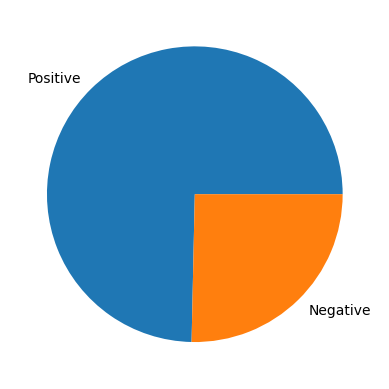

In [67]:
plt.pie(np.array([y_train.value_counts()[0], y_train.value_counts()[1]]), labels=['Positive', 'Negative'])
plt.show()

##Handle imbalanced dataset

In [68]:
!pip install imbalanced-learn

   ---------------------------------------- 0.0/258.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/258.3 kB ? eta -:--:--
   - -------------------------------------- 10.2/258.3 kB ? eta -:--:--
   ---- ---------------------------------- 30.7/258.3 kB 262.6 kB/s eta 0:00:01
   --------- ----------------------------- 61.4/258.3 kB 409.6 kB/s eta 0:00:01
   --------- ----------------------------- 61.4/258.3 kB 409.6 kB/s eta 0:00:01
   ------------- ------------------------- 92.2/258.3 kB 374.1 kB/s eta 0:00:01
   --------------------- ---------------- 143.4/258.3 kB 500.5 kB/s eta 0:00:01
   ------------------------ ------------- 163.8/258.3 kB 546.6 kB/s eta 0:00:01
   ------------------------------ ------- 204.8/258.3 kB 541.9 kB/s eta 0:00:01
   -------------------------------------- 258.3/258.3 kB 611.0 kB/s eta 0:00:00


In [70]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
vectorized_x_train_smote, y_train_smote = smote.fit_resample(vectorized_x_train, y_train)
print(vectorized_x_train_smote.shape, y_train_smote.shape)

(9460, 1145) (9460,)


In [71]:
y_train_smote.value_counts()

label
0    4730
1    4730
Name: count, dtype: int64

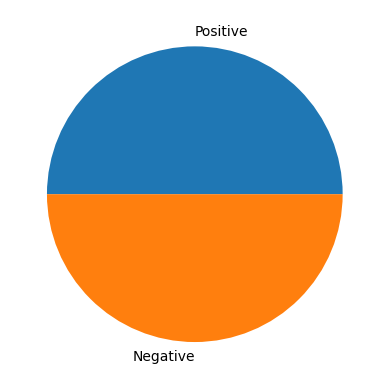

In [72]:
plt.pie(np.array([y_train_smote.value_counts()[0], y_train_smote.value_counts()[1]]), labels=['Positive', 'Negative'])
plt.show()

In [73]:
vectorized_x_train_smote

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [74]:
y_train_smote

0       0
1       0
2       0
3       0
4       0
       ..
9455    1
9456    1
9457    1
9458    1
9459    1
Name: label, Length: 9460, dtype: int64

In [75]:
vectorized_x_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [76]:
y_test

2159    0
1411    0
6673    0
231     0
765     0
       ..
7129    0
3130    0
1822    0
782     1
4299    1
Name: label, Length: 1584, dtype: int64

Model Training and Evaluation

In [77]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [78]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

def training_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)
    print(f'Training Scores:\n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}')
    
def validation_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)
    print(f'Testing Scores:\n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}')

Logistic Regression

In [80]:
lr = LogisticRegression()
lr.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = lr.predict(vectorized_x_train_smote)

y_test_pred = lr.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 0.94
	Precision = 0.916
	Recall = 0.97
	F1-Score = 0.942
Testing Scores:
	Accuracy = 0.86
	Precision = 0.691
	Recall = 0.857
	F1-Score = 0.765


Naive Bayes

In [81]:
mnb = MultinomialNB()
mnb.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = mnb.predict(vectorized_x_train_smote)

y_test_pred = mnb.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 0.903
	Precision = 0.866
	Recall = 0.953
	F1-Score = 0.908
Testing Scores:
	Accuracy = 0.862
	Precision = 0.677
	Recall = 0.921
	F1-Score = 0.78


Decision Tree

In [83]:
dt = DecisionTreeClassifier()

dt.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = dt.predict(vectorized_x_train_smote)

y_test_pred = dt.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 1.0
	Precision = 1.0
	Recall = 1.0
	F1-Score = 1.0
Testing Scores:
	Accuracy = 0.826
	Precision = 0.689
	Recall = 0.624
	F1-Score = 0.655


Random Forest

In [84]:
rf = RandomForestClassifier()

rf.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = rf.predict(vectorized_x_train_smote)

y_test_pred = rf.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 1.0
	Precision = 1.0
	Recall = 1.0
	F1-Score = 1.0
Testing Scores:
	Accuracy = 0.862
	Precision = 0.749
	Recall = 0.719
	F1-Score = 0.734


Support Vector Machine

In [88]:
svm = SVC()

svm.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = svm.predict(vectorized_x_train_smote)

y_test_pred = svm.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 0.98
	Precision = 0.965
	Recall = 0.995
	F1-Score = 0.98
Testing Scores:
	Accuracy = 0.869
	Precision = 0.725
	Recall = 0.817
	F1-Score = 0.768


In [89]:
import pickle

with open('../static/model/model.pickle', 'wb') as file:
    pickle.dump(lr, file)